# Data Preparation

This notebook is used to prepare the data for the model.

## 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Read cleaned data

In [2]:
df = pd.read_csv('processed/cleaned_data.csv')

In [3]:
# Read buildings data exported from QGIS
buildings = gpd.read_file("raw/GIS/Initiatieven.shp", encoding='utf-8', crs='EPSG:4326')
# Remove irrelevant locations
locations_to_remove = ['Digit Park Breda', 'Bavelse Berg', 'Gemeentewerf', 'Bedrijventerrein Druivenstraat']
buildings = buildings[~buildings['Initiatief'].isin(locations_to_remove)]
# Rename the columns
buildings.rename(columns={'Initiatief': 'stakeholder'}, inplace=True)
# Remove irrelevant columns
buildings = buildings[['id', 'stakeholder', 'geometry']]
# Set index as id
buildings.set_index('id', inplace=True)
# There is a null value generated by QGIS. Drop it.
buildings = buildings.dropna().reset_index(drop=True)
# measuring the floor area of the buildings using a cartesian CRS EPSG:32718 to get area in m^2
buildings['floor area (m^2)'] = buildings.to_crs(epsg=32718).area

NameError: name 'gpd' is not defined

## 3. Prepare data for School

The electricity consumption is scaled to the floor area of the buildings.

In [4]:
# area units are taken as sq.m
# area_of_source_building = 27000
# number_of_floors = 2
# measuring the floor area of the buildings using a cartesian CRS EPSG:32718 to get area in m^2
# area_of_destination_building = buildings[buildings['stakeholder'] == 'Curio'][
#                                    'floor area (m^2)'].sum() * number_of_floors
# scaling_factor = area_of_destination_building / area_of_source_building

In [5]:
df['school_mbo'] = df['School'] # * scaling_factor

## 4. Prepare data for Drinks Packaging SME

In [6]:
# area_of_source_building = 13500
# number_of_floors = 2
# area_of_destination_building = buildings[buildings['stakeholder'] == 'Konings Drinks'][
#                                    'floor area (m^2)'].sum() * number_of_floors
# scaling_factor = area_of_destination_building / area_of_source_building

In [7]:
df['drink_packaging_sme'] = df['Office 4'] #* scaling_factor

## 5. Prepare data for Food packaging SME

In [8]:
# area_of_source_building = 13500
# number_of_floors = 2
# area_of_destination_building = buildings[buildings['stakeholder'] == 'Sligro'][
#                                    'floor area (m^2)'].sum() * number_of_floors
# scaling_factor = area_of_destination_building / area_of_source_building

In [9]:
df['food_packaging_sme'] = df['Office 4']# * scaling_factor

## 6. Prepare data for EV-bus charging stations

In [10]:
df.rename(columns={'BusDepot [kWh]': 'EV_bus_charging_station'}, inplace=True)

## 7. Combine all data

In [11]:
df['Local'] = pd.to_datetime(df['Local'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Local', inplace=True)

In [12]:
# Add missing values
df.loc['2021-01-01 00:00:00',:] = df.loc['2021-01-01 00:30:00',:]
df.loc['2021-01-01 00:15:00',:] = df.loc['2021-01-01 00:30:00',:]
df.loc['2021-12-31 23:15:00',:] = df.loc['2021-12-31 23:00:00',:]
df.loc['2021-12-31 23:30:00',:] = df.loc['2021-12-31 23:15:00',:]
df.loc['2021-12-31 23:45:00',:] = df.loc['2021-12-31 23:30:00',:]

In [13]:
df

,Office 1,Office 2,Office 3,Office 4,School,EV_bus_charging_station,Irradiance [W/m^2],T_ambient [Degrees Celsius],T_ground [Degrees Celsius],Wind [m/s],...,Diffuse [W/m^2],Direct [W/m^2],Elevation [Degrees],Azimuth [Degrees],hh1_consumption [kWh],hh2_consumption [kWh],hh3_consumption [kWh],school_mbo,drink_packaging_sme,food_packaging_sme
Local,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:30:00,9.4,4.8,1.8,18.5,12.336667,3840.0,0.0,3066.0,1.73,3634.0,...,0.0,0.0,-60049.0,21.785,0.155531,0.122680,0.383605,12.336667,18.5,18.5
2021-01-01 00:45:00,9.4,5.1,1.8,17.0,11.323333,3840.0,0.0,3066.0,1.73,3634.0,...,0.0,0.0,-60049.0,21.785,0.152786,0.123942,0.353554,11.323333,17.0,17.0
2021-01-01 01:00:00,9.4,4.8,1.7,21.0,11.915000,2520.0,0.0,3066.0,1.73,3634.0,...,0.0,0.0,-60049.0,21.785,0.147419,0.122407,0.322331,11.915000,21.0,21.0
2021-01-01 01:15:00,9.6,4.6,1.8,17.5,11.575000,2520.0,0.0,3066.0,1.73,3634.0,...,0.0,0.0,-60049.0,21.785,0.141327,0.121962,0.300250,11.575000,17.5,17.5
2021-01-01 01:30:00,8.7,4.6,1.8,20.0,12.170000,2520.0,0.0,2949.0,1625.00,3469.0,...,0.0,0.0,-54847.0,45.722,0.140301,0.118858,0.287108,12.170000,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 00:00:00,9.4,4.8,1.8,18.5,12.336667,3840.0,0.0,3066.0,1.73,3634.0,...,0.0,0.0,-60049.0,21.785,0.155531,0.122680,0.383605,12.336667,18.5,18.5
2021-01-01 00:15:00,9.4,4.8,1.8,18.5,12.336667,3840.0,0.0,3066.0,1.73,3634.0,...,0.0,0.0,-60049.0,21.785,0.155531,0.122680,0.383605,12.336667,18.5,18.5
2021-12-31 23:15:00,5.1,5.5,1.5,16.0,11.846364,3780.0,0.0,3245.0,2038.00,3724.0,...,0.0,0.0,-58117.0,326.722,0.197897,0.945290,0.443243,11.846364,16.0,16.0


NameError: name 'buildings' is not defined

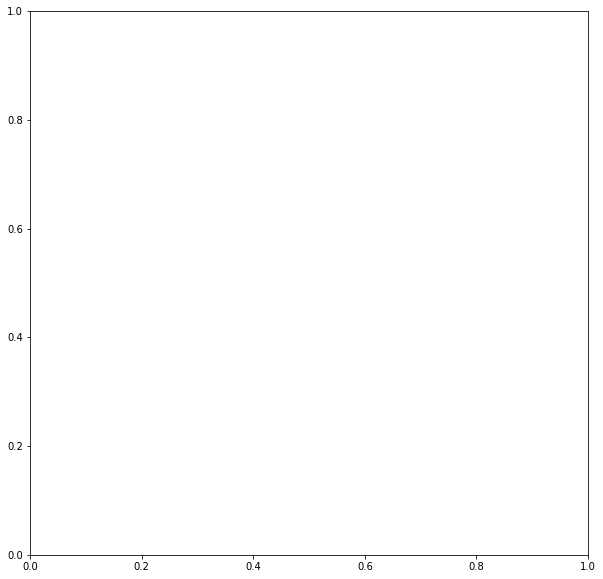

In [14]:
fig, ax = plt.subplots(1, figsize=(10, 10))
# heat_network.plot(ax=ax, color='red')
# neighborhoods.plot(ax=ax, color='green')
# neighborhood_energy_code.plot(ax=ax, color='green')
buildings[buildings['stakeholder'] == 'Busremise'].plot(ax=ax, color='red')
buildings[buildings['stakeholder'] == 'Curio'].plot(ax=ax, color='green')
buildings[buildings['stakeholder'] == 'Konings Drinks'].plot(ax=ax, color='yellow')
buildings[buildings['stakeholder'] == 'Wonen Breburg - Tijdelijke woningbouw'].plot(ax=ax, color='blue', alpha=0.2,
                                                                                    label='Wonen Breburg - Tijdelijke woningbouw')
buildings[buildings['stakeholder'] == 'Sligro'].plot(ax=ax, color='orange', label='Sligro')

## 8. Export data

In [15]:
df.to_csv('processed/model_input_data.csv')

---

In [25]:
df['Wind [m/s]'].mean()

3291.1822602739726

In [17]:
# Calculate energy costs
# Measuring service in €/ day
meter_costs = 0.08304
# Connection service in €/ day
if base_load <= 17:
    connection_service = 0.05564
else:
    connection_service =  0.07230


NameError: name 'base_load' is not defined

In [ ]:
import datetime
start_date = datetime.datetime(2021, 1, 1)
date = start_date.strftime('%Y-%m-%d')

In [ ]:
date